In [2]:
import numpy as np
import cv2 as cv
from mtcnn import MTCNN
from deepface import DeepFace
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
detector = MTCNN()

In [4]:
# Generate face embeddings using FaceNet
def generate_embedding(img_path):
    """Generate face embeddings using DeepFace"""

    embedding = DeepFace.represent(img_path, model_name='Facenet', enforce_detection=False)
    
    return embedding[0]

In [5]:
def detect_face(image_path):
    """Detect face in an image using MTCNN"""
    
    if isinstance(image_path, str):  
        image = cv.imread(image_path)  # Load image from file
    elif isinstance(image_path, np.ndarray):  
        image = image_path  # Use the given image array
    else:
        raise ValueError("Input must be a file path or a NumPy image array")
    
    faces = detector.detect_faces(image)

    embeddings = generate_embedding(image_path)

    if faces:
        facial_area = embeddings['facial_area']  # This will be a dict: {'x':..., 'y':..., 'w':..., 'h':...}
        x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
        x, y = max(0, x), max(0, y)  # Ensure positive coordinates
        
        face = image[y:y+h, x:x+w]  # Extract the detected face

        # Convert BGR to RGB (for displaying with matplotlib)
        image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        # Draw a rectangle around the detected face
        cv.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 4)

        print(f"Face detected shape: {face.shape}")

        # Show the image with the detected face
        plt.axis('off')
        plt.imshow(image_rgb)
        plt.show()

        # Resize and normalize the face for model input
        face = cv.resize(face, (160, 160))
        face = np.expand_dims(face, axis=0)  # Add batch dimension
        face = face.astype('float32') / 255  # Normalize to [0, 1]

        return face, facial_area  # Return the processed face instead of full image

    print("No face detected")
    return None, None

Face detected shape: (638, 638, 3)


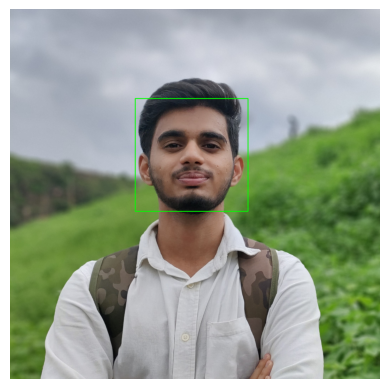

In [6]:
img1 = "../assets/mypfp.jpg"
face1 = detect_face(img1)

In [7]:
embedding1 = generate_embedding(img1)
print("Embedding 1:", embedding1)

Embedding 1: {'embedding': [0.31647926568984985, -2.521256685256958, 0.741299033164978, 2.3745343685150146, -0.6307662129402161, 1.0212905406951904, -0.4191291928291321, -0.4680407643318176, 0.9178754687309265, 3.3074727058410645, -2.5830750465393066, -1.1360543966293335, -0.5486275553703308, -0.631008505821228, -1.359578013420105, 0.5478253960609436, 1.36569082736969, 0.7520008683204651, 1.0038682222366333, -1.273209571838379, 0.4630086123943329, -0.4041936695575714, 1.1152344942092896, -0.16320136189460754, 0.2900059223175049, 0.44504714012145996, 0.955573320388794, 0.6306536197662354, -0.7018867135047913, -0.18712659180164337, -0.07624377310276031, 0.23559468984603882, 0.25781041383743286, -1.711057424545288, 1.6259973049163818, -0.4987369775772095, -0.6400196552276611, 1.112959861755371, 0.7915258407592773, 0.08818688988685608, -1.7718991041183472, 0.7172887921333313, 1.4775192737579346, -0.9625142216682434, 0.9702996015548706, 0.499042809009552, -0.943473756313324, 1.7561507225036

Face detected shape: (347, 347, 3)


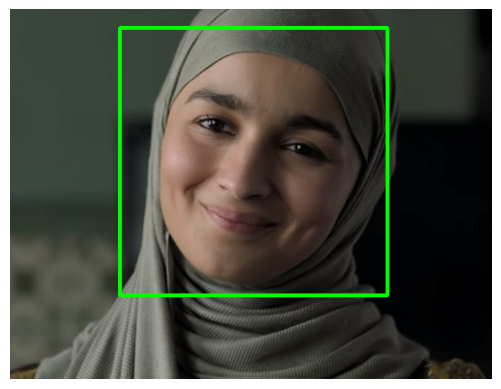

In [8]:
img2 = "../assets/alia.png"
face2 = detect_face(img2)

In [9]:
embedding2 = generate_embedding(img2)
print("Embedding 2:", embedding2)

Embedding 2: {'embedding': [1.1756073236465454, -0.3050939738750458, 1.2528234720230103, -0.8128432035446167, -0.14439207315444946, -0.527253270149231, 1.361471176147461, 0.2692267894744873, -0.03296270966529846, 1.9730398654937744, -0.6888073086738586, -0.19451025128364563, -0.7275806069374084, -0.08032339066267014, 1.0236872434616089, 0.0270807147026062, 1.2502272129058838, -1.1324384212493896, -0.3170403242111206, -0.17425929009914398, -0.7057769298553467, -0.3329547643661499, -0.20533105731010437, 0.39068251848220825, 1.0263416767120361, -0.03397265076637268, 0.4939543306827545, 0.009649582207202911, -0.010039642453193665, 1.4343681335449219, 0.4310051202774048, -2.6702053546905518, -1.1139802932739258, -0.3410698473453522, 0.2571576237678528, -0.8133007287979126, 2.1854560375213623, 0.8162960410118103, 0.27039679884910583, -1.187818169593811, -2.0830929279327393, 1.0433179140090942, 0.14744910597801208, 0.4453079104423523, -0.456572949886322, -0.1238737553358078, -0.26641938090324

In [10]:
print(embedding1['embedding'][:5])

[0.31647926568984985, -2.521256685256958, 0.741299033164978, 2.3745343685150146, -0.6307662129402161]


In [11]:
print(embedding2['embedding'][:5])

[1.1756073236465454, -0.3050939738750458, 1.2528234720230103, -0.8128432035446167, -0.14439207315444946]


In [12]:
print(embedding1['facial_area']['x'])
print(embedding1['facial_area']['y'])
print(embedding1['facial_area']['w'])
print(embedding1['facial_area']['h'])

708
506
638
638


Press 's' to capture your face and save.
Press 'q' to quit.
Face detected shape: (320, 320, 3)


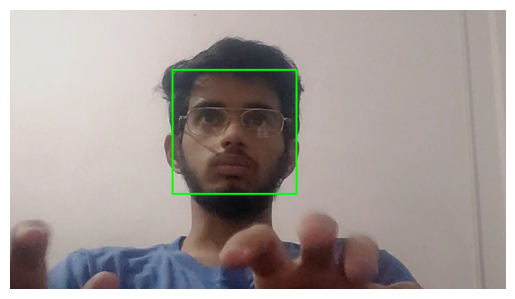

Face detected! Press 's' to save or 'q' to quit.
Face detected shape: (336, 336, 3)


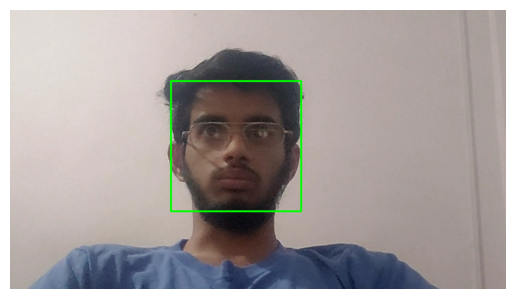

Face detected! Press 's' to save or 'q' to quit.
Face detected shape: (339, 339, 3)


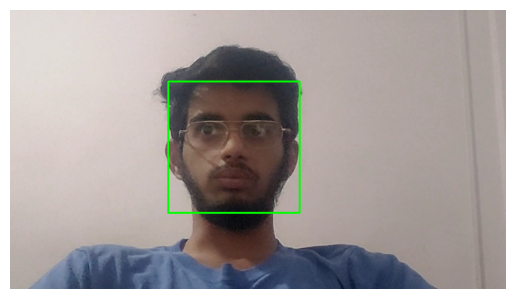

Face detected! Press 's' to save or 'q' to quit.
Face detected shape: (719, 1279, 3)


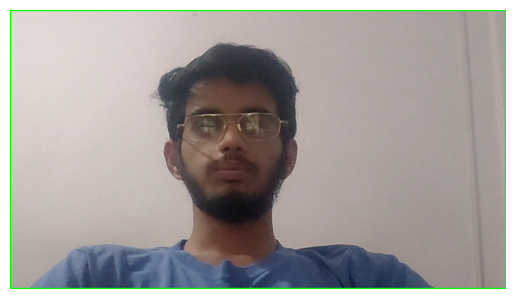

Face detected! Press 's' to save or 'q' to quit.
No face detected
Face detected! Press 's' to save or 'q' to quit.
Face detected shape: (330, 330, 3)


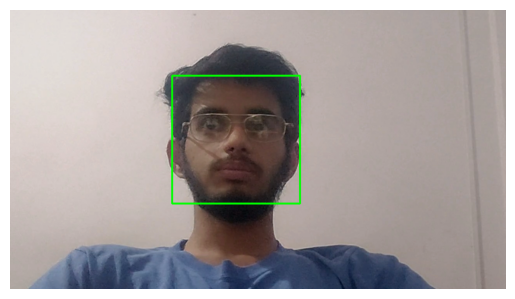

Face detected! Press 's' to save or 'q' to quit.
No face detected
Face detected! Press 's' to save or 'q' to quit.
Face detected shape: (333, 333, 3)


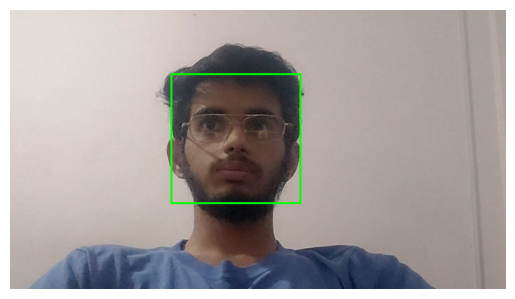

Face detected! Press 's' to save or 'q' to quit.
Face detected shape: (331, 331, 3)


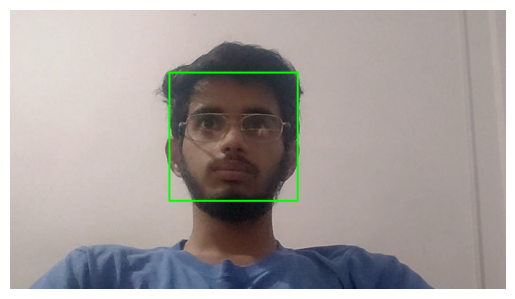

Face detected! Press 's' to save or 'q' to quit.
No face detected
Face detected! Press 's' to save or 'q' to quit.
Face detected shape: (336, 336, 3)


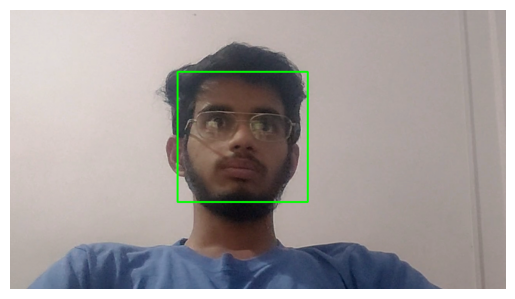

Face detected! Press 's' to save or 'q' to quit.
No face detected
Face detected! Press 's' to save or 'q' to quit.


In [ ]:
import sqlite3
import pickle
import cv2

def capture_faces():
    # Connect to SQLite database
    conn = sqlite3.connect('face_recognition.db')
    cursor = conn.cursor()

    # Create a table to store user data and face embeddings
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        face_embedding BLOB NOT NULL
    )
    ''')
    conn.commit()

    # Initialize webcam
    video_capture = cv2.VideoCapture(0)

    print("Press 's' to capture your face and save.")
    print("Press 'q' to quit.")
    
    # Prompt the user to enter their name
    name = input("Enter your name: ")

    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("Failed to capture video.")
            break

        # Detect faces in the frame
        face, facial_area = detect_face(frame)

        if face is not None and facial_area is not None:
            # Extract bounding box coordinates
            x, y, width, height = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']

            # Draw bounding box around detected face
            cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)

        # # Display the frame
        # cv2.imshow("Register Face", frame)

        print("Face detected! Press 's' to save or 'q' to quit.")

        # Press 's' to capture and save the face
        key = cv2.waitKey(1) & 0xFF
        if key == ord('s'):
            if face is not None and facial_area is not None:
                # Extract bounding box coordinates
                x, y, width, height = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']

                # Draw bounding box around detected face
                cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)
                face_image = frame[y:y + height, x:x + width]

                # Generate face embedding using DeepFace
                embedding = generate_embedding(face_image)

                # Convert the embedding to a binary format for storage
                embedding_blob = pickle.dumps(embedding)

                # Save the user data and face embedding to the database
                cursor.execute('''
                INSERT INTO users (name, face_embedding)
                VALUES (?, ?)
                ''', (name, embedding_blob))
                conn.commit()

                print(f"Face saved for user: {name}")
            else:
                print("No face detected. Please try again.")

        # Press 'q' to quit
        elif key == ord('q'):
            break

    # Release the webcam and close windows
    video_capture.release()
    cv2.destroyAllWindows()

    # Close the database connection
    conn.close()

# Run the function
capture_faces()

In [ ]:
import cv2 as cv
import numpy as np
import sqlite3
import pickle
from deepface import DeepFace
from mtcnn import MTCNN

# Initialize MTCNN detector
detector = MTCNN()

def recognize_faces():
    """
    Recognize faces in real-time using MTCNN for detection and DeepFace for recognition.
    """
    # Step 1: Load known faces from the database
    conn = sqlite3.connect('face_recognition.db')
    cursor = conn.cursor()

    # Retrieve all users from the database
    cursor.execute('SELECT name, face_embedding FROM users')
    rows = cursor.fetchall()

    # Load known embeddings and names
    known_names = []
    known_embeddings = []
    for row in rows:
        name, embedding_blob = row
        embedding = pickle.loads(embedding_blob)  # Convert binary data back to embedding
        known_names.append(name)
        known_embeddings.append(embedding)

    # Step 2: Initialize webcam
    video_capture = cv.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    print("Press 'q' to quit.")

    while True:
        # Capture frame-by-frame
        ret, frame = video_capture.read()
        if not ret:
            print("Failed to capture video.")
            break

        # Step 3: Detect faces in the frame using MTCNN
        faces = detector.detect_faces(frame)

        # Loop through each detected face
        for face in faces:
            # Extract face bounding box
            x, y, w, h = face['box']
            x, y = max(0, x), max(0, y)  # Ensure positive coordinates

            # Extract the face region
            face_image = frame[y:y+h, x:x+w]

            # Step 4: Generate embedding for the detected face using DeepFace
            try:
                # Generate embedding for the detected face
                result = DeepFace.represent(face_image, model_name="VGG-Face", enforce_detection=False)
                embedding = result[0]['embedding']  # Extract the embedding

                # Step 5: Compare the embedding with known embeddings
                distances = []
                for known_embedding in known_embeddings:
                    # Calculate Euclidean distance between embeddings
                    distance = np.linalg.norm(np.array(embedding) - np.array(known_embedding))
                    distances.append(distance)

                if distances:
                    # Find the best match (minimum distance)
                    min_distance = min(distances)
                    best_match_index = np.argmin(distances)

                    # Set a threshold for recognition
                    recognition_threshold = 0.7  # Adjust this threshold as needed
                    if min_distance < recognition_threshold:
                        name = known_names[best_match_index]  # Recognized user
                    else:
                        name = "Unknown"  # No match found
                else:
                    name = "Unknown"  # No known embeddings to compare

            except Exception as e:
                print(f"Error during face recognition: {e}")
                name = "Unknown"

            # Step 6: Draw bounding box and display the name
            cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box
            cv.putText(frame, name, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Display name

        # Display the frame
        cv.imshow("Recognize Face", frame)

        # Press 'q' to quit
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    video_capture.release()
    cv.destroyAllWindows()

    # Close the database connection
    conn.close()

# Run the function
recognize_faces()